## data

In [1]:
import pandas as pd

In [2]:
prices=pd.read_csv("./data/prices.csv", index_col=0,parse_dates=True)
factors=pd.read_csv("./data/factors.csv", index_col=0,parse_dates=True)
print(prices.shape)
print(prices.head(3))

(757, 5)
             AAPL    MSFT          AMZN    BRK.B     JNJ 
2019-01-02   39.48  101.12   1,539.1300    202.80  127.75
2019-01-03   35.55   97.40   1,500.2800    191.66  125.72
2019-01-04   37.07  101.93   1,575.3900    195.20  127.83


In [3]:
print(factors.shape)
print(factors.head(3))

(757, 6)
            Mkt-RF   SMB   HML   RMW   CMA    RF
2019-01-02    0.23  0.74  1.13 -0.13  0.27  0.01
2019-01-03   -2.45  0.49  1.20 -0.23  0.89  0.01
2019-01-04    3.55  0.36 -0.70 -0.10 -0.60  0.01


In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    AAPL    757 non-null    float64
 1    MSFT    757 non-null    float64
 2    AMZN    757 non-null    object 
 3    BRK.B   757 non-null    float64
 4    JNJ     757 non-null    float64
dtypes: float64(4), object(1)
memory usage: 35.5+ KB


In [5]:
print("Before: ",prices.columns)
prices.columns = prices.columns.str.strip()
print("After: ",prices.columns)

Before:  Index([' AAPL ', ' MSFT ', ' AMZN ', ' BRK.B ', ' JNJ '], dtype='object')
After:  Index(['AAPL', 'MSFT', 'AMZN', 'BRK.B', 'JNJ'], dtype='object')


In [6]:
print("Convert AMZN into number")
prices['AMZN'] = prices.AMZN.str.strip().str.replace(",","").astype(float)

Convert AMZN into number


In [7]:
returns = prices.pct_change() * 100
returns

AAPL      MSFT      AMZN     BRK.B       JNJ
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -9.954407 -3.678797 -2.524153 -5.493097 -1.589041
2019-01-04  4.275668  4.650924  5.006399  1.847021  1.678333
2019-01-07 -0.242784  0.127539  3.435340  0.876025 -0.641477
2019-01-08  1.919957  0.725064  1.661236 -0.304708  2.322652
...              ...       ...       ...       ...       ...
2021-12-27  2.297481  2.318563 -0.817801  0.740263  0.843982
2021-12-28 -0.576720 -0.350416  0.584371  0.546061  0.400778
2021-12-29  0.050198  0.205128 -0.855497  0.392236  0.704432
2021-12-30 -0.657821 -0.769118 -0.328899  0.173646  0.443020
2021-12-31 -0.353535 -0.884121 -1.142937 -0.326688 -0.719633

[757 rows x 5 columns]

<AxesSubplot:>

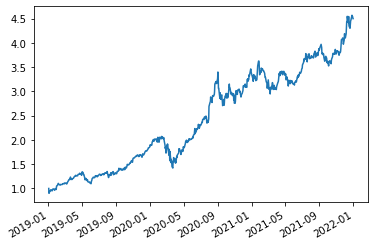

In [8]:
(returns['AAPL'].fillna(0)/100 + 1).cumprod().plot()

<AxesSubplot:>

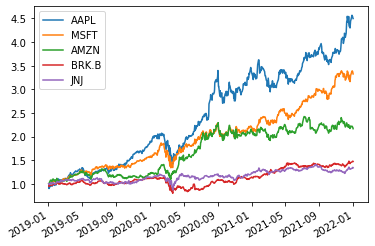

In [9]:
(returns.fillna(0)/100+1).cumprod().plot()

In [10]:
df=factors.merge(returns,left_index=True, right_index=True)
df

Mkt-RF   SMB   HML   RMW   CMA    RF      AAPL      MSFT  \
2019-01-02    0.23  0.74  1.13 -0.13  0.27  0.01       NaN       NaN   
2019-01-03   -2.45  0.49  1.20 -0.23  0.89  0.01 -9.954407 -3.678797   
2019-01-04    3.55  0.36 -0.70 -0.10 -0.60  0.01  4.275668  4.650924   
2019-01-07    0.94  0.87 -0.74 -0.73 -0.46  0.01 -0.242784  0.127539   
2019-01-08    1.01  0.45 -0.63  0.31 -0.07  0.01  1.919957  0.725064   
...            ...   ...   ...   ...   ...   ...       ...       ...   
2021-12-27    1.22 -0.11  0.28  0.97  0.47  0.00  2.297481  2.318563   
2021-12-28   -0.27 -0.41  0.80  0.83  0.21  0.00 -0.576720 -0.350416   
2021-12-29    0.06 -0.01  0.15  0.67 -0.01  0.00  0.050198  0.205128   
2021-12-30   -0.15  0.06 -0.38 -0.82 -0.41  0.00 -0.657821 -0.769118   
2021-12-31   -0.31  0.18  0.53  0.34  0.42  0.00 -0.353535 -0.884121   

                AMZN     BRK.B       JNJ  
2019-01-02       NaN       NaN       NaN  
2019-01-03 -2.524153 -5.493097 -1.589041  
2019-01-04  5.006399  1.847021  1.678333  
2019-01-07  3.435340  0.876025 -0.641477  
2019-01-08  1.661236 -0.304708  2.322652  
...              ...       ...       ...  
2021-12-27 -0.817801  0.740263  0.843982  
2021-12-28  0.584371  0.546061  0.400778  
2021-12-29 -0.855497  0.392236  0.704432  
2021-12-30 -0.328899  0.173646  0.443020  
2021-12-31 -1.142937 -0.326688 -0.719633  

[757 rows x 11 columns]

In [11]:
df.isna().sum()

Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
AAPL      1
MSFT      1
AMZN      1
BRK.B     1
JNJ       1
dtype: int64

<AxesSubplot:>

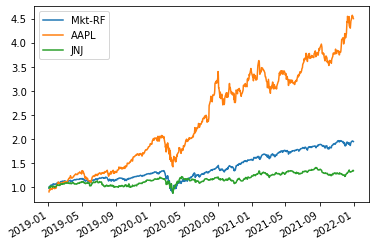

In [12]:
df = df.dropna()
(df/100+1).cumprod()[['Mkt-RF','AAPL','JNJ']].plot()

## (1) OLS: single factor, multiple factors

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
col_factors = factors.columns.drop('RF')
print(col_factors)

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], dtype='object')


#### multi-variate linear regression
#### factor loading of mkt is 1.328, i.e. if market goes up by 1%, the stock price goes up by 1.328%

In [15]:
X = df[col_factors]
y = df['AAPL']
reg = LinearRegression().fit(X, y)
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)

R2 0.7435778597194065
Factor loadings: [ 1.32814828 -0.16089528 -0.77033003  0.57809692  1.08529966]


#### single factor OLS
#### factor loading of mkt is 1.166

In [16]:
X = df[['Mkt-RF']]
y = df['AAPL']
reg = LinearRegression().fit(X, y)
print('R2',reg.score(X, y))
print('Factor loadings:', reg.coef_)

R2 0.6057018136532135
Factor loadings: [1.16613682]


#### Which model is better? Multivariate, because R2 is 0.74, higher than 0.6.
#### Hence, pick a combination of factors that contribut to a model with higher explaining power.

## (2) Simple Moving Average, Exponential Weighted Average

In [17]:
X.mean()

Mkt-RF    0.098347
dtype: float64

In [18]:
sma52 = X.rolling(window=52).mean() # SMA 52
sma52

Mkt-RF
2019-01-03       NaN
2019-01-04       NaN
2019-01-07       NaN
2019-01-08       NaN
2019-01-09       NaN
...              ...
2021-12-27  0.151923
2021-12-28  0.138462
2021-12-29  0.107885
2021-12-30  0.092885
2021-12-31  0.079038

[756 rows x 1 columns]

In [19]:
ewa10 = X.ewm(span=10,adjust=False).mean()
ewa10

Mkt-RF
2019-01-03 -2.450000
2019-01-04 -1.359091
2019-01-07 -0.941074
2019-01-08 -0.586334
2019-01-09 -0.377909
...              ...
2021-12-27  0.476008
2021-12-28  0.340370
2021-12-29  0.289394
2021-12-30  0.209504
2021-12-31  0.115049

[756 rows x 1 columns]

In [20]:
df_average = pd.concat([sma52,ewa10,X],axis=1).dropna()
df_average.columns=['sma52','ewa10','Mkt']

#### moving average has the capability of smoothing a time series, so as to reduce noise and filters out information
##### a. simple moving average: the smaller the window size is, the more responsive to changes, or less stable
##### b. exponential weighted average is better when the market is rapidly changing
##### c. raw data is clearly mostly noisy

<AxesSubplot:>

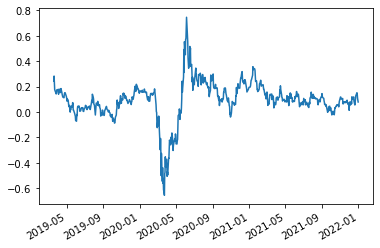

In [21]:
df_average.sma52.plot()

<AxesSubplot:>

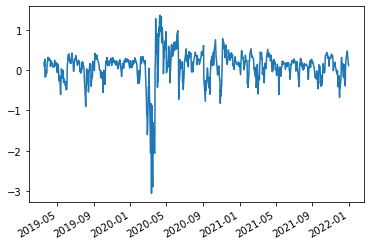

In [22]:
df_average.ewa10.plot()

<AxesSubplot:>

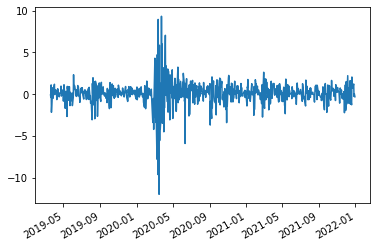

In [23]:
df_average.Mkt.plot()

## (3) SMA, EWA of market factors

In [24]:
'''
X = df[col_factors]
y = df['AAPL']
reg = LinearRegression().fit(X, y)
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)
'''

"\nX = df[col_factors]\ny = df['AAPL']\nreg = LinearRegression().fit(X, y)\nprint('R2',reg.score(X, y))\nprint('Factor loadings:',reg.coef_)\n"

#### OLS lookback period

In [25]:
window=252
reg = LinearRegression()
col_X = col_factors
col_y = 'AAPL'
print("OLS lookback period is 252")
print("Here 252 means using 252-day data points to do regression")
for i in [0]:
    sub=df.iloc[i:i+window]
    X=sub[col_X]
    y=sub[col_y]
    print(sub.shape)
    print(reg.fit(X,y).coef_)

OLS lookback period is 252
Here 252 means using 252-day data points to do regression
(252, 11)
[ 1.39516621 -0.0690525  -0.30077773  0.94896576 -0.52124844]


In [26]:
res=[]
window=252
reg = LinearRegression()
col_X = col_factors
col_y = 'AAPL'
for i in range(len(df)-window+1):
    sub=df.iloc[i:i+window] # until i+window=length, i can be at most len(df)-window
    X=sub[col_X]
    y=sub[col_y]
    res.append(reg.fit(X,y).coef_)

In [27]:
factor_loadings = pd.DataFrame(res,index=df.index[-(len(df)-window)-1:],columns=col_factors)

In [28]:
factor_loadings

Mkt-RF       SMB       HML       RMW       CMA
2020-01-02  1.395166 -0.069053 -0.300778  0.948966 -0.521248
2020-01-03  1.324062 -0.007845 -0.262084  0.837172 -0.350760
2020-01-06  1.343588 -0.008797 -0.267378  0.836364 -0.351007
2020-01-07  1.347740  0.012659 -0.276991  0.805609 -0.354577
2020-01-08  1.350080  0.012301 -0.282578  0.802528 -0.351555
...              ...       ...       ...       ...       ...
2021-12-27  1.310532 -0.291713 -0.991073  0.343453  1.681184
2021-12-28  1.300598 -0.290190 -0.984452  0.320475  1.669528
2021-12-29  1.300789 -0.296417 -0.980642  0.320075  1.663928
2021-12-30  1.299340 -0.293362 -0.980361  0.317457  1.661730
2021-12-31  1.302835 -0.297438 -0.975724  0.318920  1.653117

[505 rows x 5 columns]

<AxesSubplot:>

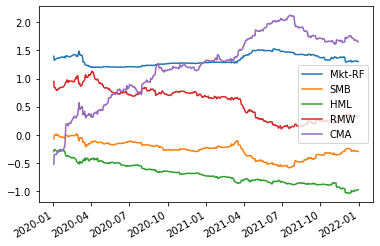

In [29]:
factor_loadings.plot()

#### OLS: SMA52

<AxesSubplot:>

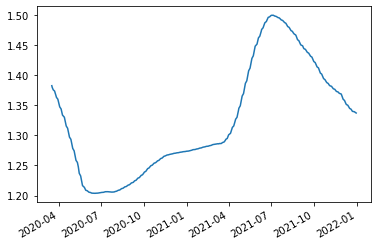

In [30]:
factor_loadings['Mkt-RF'].rolling(window=52).mean().plot()

<AxesSubplot:>

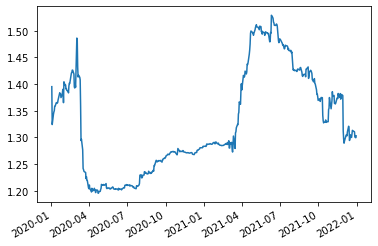

In [31]:
factor_loadings['Mkt-RF'].plot()

<AxesSubplot:>

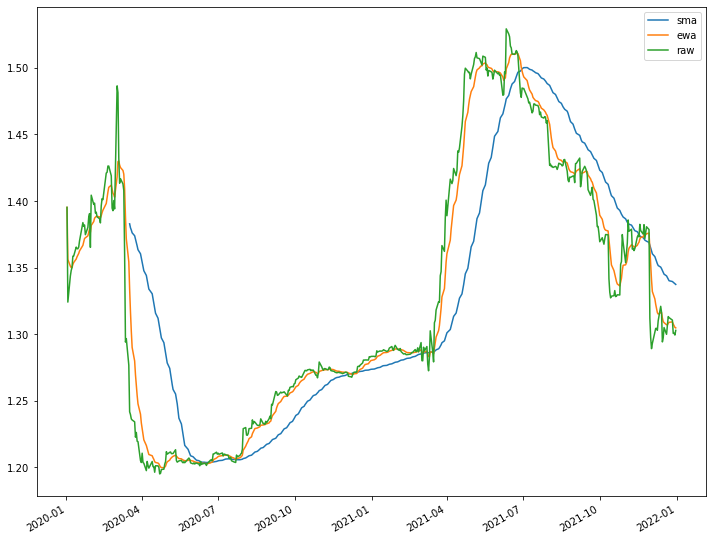

In [32]:
df_factor_lodings = pd.concat([
        factor_loadings['Mkt-RF'].rolling(window=52).mean(),
        factor_loadings['Mkt-RF'].ewm(span=10).mean(),
        factor_loadings['Mkt-RF']
],axis=1)
df_factor_lodings.columns=['sma','ewa','raw']
df_factor_lodings.plot(figsize=(12,10))

## (4) Ridge Regression, Lasso Regression, Elastic Net

In [33]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [34]:
X = df[col_factors]
y = df['AAPL']
reg = LinearRegression().fit(X, y)
print("OLS")
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)

OLS
R2 0.7435778597194065
Factor loadings: [ 1.32814828 -0.16089528 -0.77033003  0.57809692  1.08529966]


In [35]:
X = df[col_factors]
y = df['AAPL']
reg = Ridge(alpha=1.0).fit(X, y)
print("Ridge")
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)

Ridge
R2 0.7435716341103369
Factor loadings: [ 1.32631377 -0.16228356 -0.76550893  0.57519124  1.07209435]


In [36]:
X = df[col_factors]
y = df['AAPL']
reg = Lasso(alpha=0.1).fit(X, y)
print("Lasso")
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)

Lasso
R2 0.7060112274641843
Factor loadings: [ 1.19804083 -0.16533399 -0.41661031  0.23314474  0.17555002]


In [37]:
X = df[col_factors]
y = df['AAPL']
reg = ElasticNet(alpha=0.1,l1_ratio=0.1).fit(X, y)
print("Elastic Net")
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)

Elastic Net
R2 0.7294525385705645
Factor loadings: [ 1.2230152  -0.20433875 -0.54176254  0.39739098  0.5193939 ]


## (5) train_test_split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
arr = list(range(20))
arrX = arr
arrY = arr

In [40]:
print("Select train and test sets with shuffling")
X_train, X_test, y_train, y_test = train_test_split(arrX, arrY)
print('X_train', X_train)
print('y_train', y_train)
print('X_test', X_test)
print('y_test', y_test)

Select train and test sets with shuffling
X_train [15, 18, 8, 17, 4, 9, 3, 10, 13, 0, 5, 7, 2, 6, 14]
y_train [15, 18, 8, 17, 4, 9, 3, 10, 13, 0, 5, 7, 2, 6, 14]
X_test [19, 12, 16, 11, 1]
y_test [19, 12, 16, 11, 1]


In [41]:
print("Fix the test size to be 20%")
X_train, X_test, y_train, y_test = train_test_split(arrX, arrY, test_size=0.2)
print('X_train', X_train)
print('y_train', y_train)
print('X_test', X_test)
print('y_test', y_test)

Fix the test size to be 20%
X_train [1, 10, 12, 2, 11, 15, 0, 13, 9, 18, 4, 5, 19, 17, 16, 8]
y_train [1, 10, 12, 2, 11, 15, 0, 13, 9, 18, 4, 5, 19, 17, 16, 8]
X_test [6, 3, 14, 7]
y_test [6, 3, 14, 7]


In [42]:
print("Fix the test size as 20% + split in order")
X_train, X_test, y_train, y_test = train_test_split(arrX, arrY, test_size=0.2, shuffle=False)
print('X_train', X_train)
print('y_train', y_train)
print('X_test', X_test)
print('y_test', y_test)

Fix the test size as 20% + split in order
X_train [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y_train [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
X_test [16, 17, 18, 19]
y_test [16, 17, 18, 19]


## (6) Cross Validation: KFold, TimeSeriesSplit, DayForwardSplit

In [43]:
from sklearn.model_selection import KFold, TimeSeriesSplit, cross_val_score, GridSearchCV
import numpy as np

In [44]:
class DayForwardSplit:
    def __init__(self, test_size, train_size, n_splits=None):
        self.n_splits = n_splits
        self.test_size = test_size
        self.train_size = train_size
    
    def get_n_splits(self, X, y, groups):
        if self.n_splits == None:
            self.n_splits = len(X) - self.train_size - self.test_size + 1
        return self.n_splits
        
    def split(self, X, y=None, groups=None):
        rightmost = len(X)
        if self.n_splits == None:
            self.n_splits = rightmost - self.train_size - self.test_size + 1
        indices = np.arange(rightmost)
        for i in range(self.n_splits):
            right = rightmost - self.n_splits + i + 1
            mid = right - self.test_size
            left = mid - self.train_size
            yield indices[left:mid],indices[mid:right]

In [45]:
arr=list(range(20))

#### K-Fold

In [46]:
kfold_split = KFold(n_splits=5)
for i in kfold_split.split(arr):
    print(i)

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), array([0, 1, 2, 3]))
(array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), array([4, 5, 6, 7]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15, 16, 17, 18, 19]), array([ 8,  9, 10, 11]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19]), array([12, 13, 14, 15]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([16, 17, 18, 19]))


#### TimeSeriesSplit

In [47]:
time_series_split = TimeSeriesSplit(n_splits=3,test_size=2,max_train_size=7)
for i in time_series_split.split(arr):
    print(i)

(array([ 7,  8,  9, 10, 11, 12, 13]), array([14, 15]))
(array([ 9, 10, 11, 12, 13, 14, 15]), array([16, 17]))
(array([11, 12, 13, 14, 15, 16, 17]), array([18, 19]))


#### DayForwardSplit

In [48]:
day_forward_split = DayForwardSplit(test_size=2, train_size=7, n_splits=3)
for i in day_forward_split.split(arr):
    print(i)

(array([ 9, 10, 11, 12, 13, 14, 15]), array([16, 17]))
(array([10, 11, 12, 13, 14, 15, 16]), array([17, 18]))
(array([11, 12, 13, 14, 15, 16, 17]), array([18, 19]))


## (7) train_test_split (simple case)

In [49]:
X = df[col_factors]
y = df['AAPL']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)

In [51]:
print('X_train', len(X_train))
print('y_train', len(y_train))
print('X_test', len(X_test))
print('y_test', len(y_test))

X_train 718
y_train 718
X_test 38
y_test 38


In [52]:
X_test

Mkt-RF   SMB   HML   RMW   CMA
2021-11-08    0.18  0.01  0.08 -0.47 -0.11
2021-11-09   -0.35 -0.14  0.47  0.56  0.26
2021-11-10   -1.07 -0.28  0.95  1.35 -0.05
2021-11-11    0.24  0.60  0.32  0.23  0.07
2021-11-12    0.74 -0.47 -0.90  0.38 -0.27
2021-11-15   -0.02 -0.45  0.71  0.56  0.47
2021-11-16    0.50 -0.16 -0.69  0.21 -0.64
2021-11-17   -0.47 -0.64 -0.27  0.81  0.16
2021-11-18    0.06 -0.73 -0.07  1.24 -0.11
2021-11-19   -0.20 -0.41 -1.29  1.08 -0.63
2021-11-22   -0.61  0.10  2.75  1.26  1.57
2021-11-23   -0.03 -0.17  1.74  0.23  1.16
2021-11-24    0.30 -0.15 -0.86 -0.52 -0.20
2021-11-26   -2.22 -1.30 -0.93  0.26 -0.59
2021-11-29    1.11 -1.31 -0.87  0.40 -0.33
2021-11-30   -1.95  0.16 -1.12 -0.16  0.41
2021-12-01   -1.61 -0.43  1.13  2.25  0.74
2021-12-02    1.51  1.01  1.26 -0.66  0.07
2021-12-03   -1.21 -0.83  1.05  1.79  1.02
2021-12-06    1.19  0.83  0.61  0.11  0.61
2021-12-07    2.22 -0.18 -1.78 -1.47 -0.44
2021-12-08    0.47  0.34 -0.84 -0.95  0.22
2021-12-09   -1.07 -1.05  1.55  1.42  0.97
2021-12-10    0.70 -0.85  0.45  1.37  0.75
2021-12-13   -1.04 -0.30 -0.96  0.29 -0.32
2021-12-14   -0.76 -0.34  1.63  0.39  0.16
2021-12-15    1.62  0.01 -1.89  0.03 -0.37
2021-12-16   -1.20 -0.84  2.79  0.64  0.63
2021-12-17   -0.65  1.44 -2.32 -1.69 -0.37
2021-12-20   -1.27 -0.20 -0.40  0.03  0.16
2021-12-21    2.06  0.67  0.19 -1.08 -0.20
2021-12-22    0.97  0.18 -0.35  0.31  0.07
2021-12-23    0.71  0.28 -0.48 -0.37 -0.37
2021-12-27    1.22 -0.11  0.28  0.97  0.47
2021-12-28   -0.27 -0.41  0.80  0.83  0.21
2021-12-29    0.06 -0.01  0.15  0.67 -0.01
2021-12-30   -0.15  0.06 -0.38 -0.82 -0.41
2021-12-31   -0.31  0.18  0.53  0.34  0.42

#### true value: 1.147

In [53]:
LinearRegression().fit(X_test,y_test).coef_

array([ 1.14735985, -0.06985432, -1.34640933,  0.55329638,  2.22638369])

#### simple OLS without lookback: 1.330

In [54]:
LinearRegression().fit(X_train,y_train).coef_

array([ 1.32974735, -0.17593727, -0.74635704,  0.56322992,  1.04252166])

#### simple OLS with lookback = 252: 1.377

In [55]:
LinearRegression().fit(X_train.iloc[-252:],y_train[-252:]).coef_

array([ 1.37721545, -0.34653248, -0.85745065,  0.21542879,  1.60869314])

#### smoothing: SMA52 = 1.383, EWA10 = 1.364

In [56]:
res=[]
window=252
reg = LinearRegression()
col_X = col_factors
col_y = 'AAPL'
number_days = len(X_train)
for i in range(number_days-window+1):
    sub_X=X_train.iloc[i:i+window] 
    sub_y=y_train.iloc[i:i+window]
    res.append(reg.fit(sub_X,sub_y).coef_)

factor_loadings = pd.DataFrame(res,index=X_train.index[-(number_days-window)-1:],columns=col_factors)
df_factor_lodings = pd.concat([
        factor_loadings['Mkt-RF'].rolling(window=52).mean(),
        factor_loadings['Mkt-RF'].ewm(span=10).mean(),
        factor_loadings['Mkt-RF']
],axis=1)
df_factor_lodings.columns=['sma','ewa','raw']

In [57]:
df_factor_lodings

sma       ewa       raw
2020-01-02       NaN  1.395166  1.395166
2020-01-03       NaN  1.356059  1.324062
2020-01-06       NaN  1.351046  1.343588
2020-01-07       NaN  1.349957  1.347740
2020-01-08       NaN  1.349992  1.350080
...              ...       ...       ...
2021-11-01  1.386511  1.352042  1.353665
2021-11-02  1.385161  1.353623  1.360739
2021-11-03  1.383956  1.356311  1.368407
2021-11-04  1.383252  1.361655  1.385703
2021-11-05  1.382513  1.364484  1.377215

[467 rows x 3 columns]

#### Ridge = 1.328, Lasso = 1.204, ElasticNet = 1.228

In [58]:
reg = Ridge(alpha=1.0).fit(X_train, y_train)
print("Ridge")
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)

Ridge
R2 0.7434234361054093
Factor loadings: [ 1.32788793 -0.1773052  -0.74150129  0.5600672   1.0291485 ]


In [59]:
reg = Lasso(alpha=0.1).fit(X_train, y_train)
print("Lasso")
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)

Lasso
R2 0.7020988551446284
Factor loadings: [ 1.20417631 -0.18409101 -0.39408622  0.18708052  0.13480727]


In [60]:
reg = ElasticNet(alpha=0.1, l1_ratio=0.1).fit(X_train, y_train)
print("ElasticNet")
print('R2',reg.score(X, y))
print('Factor loadings:',reg.coef_)

ElasticNet
R2 0.728443221136924
Factor loadings: [ 1.22814465 -0.21530474 -0.5269682   0.37923055  0.49541966]


In [61]:
'''
In summary, models have hyperparameters.

OLS: lookback period
SMA, EWA: window size
Ridge, Lasso: alpha
ElasticNet: alpha, l1_ratio

Question: which model should I use? what hyper-parameters should I pick?
--> Model Selection & Hyperparameter Tuning with Cross Validation
    We do experiments to test it out
'''

'\nIn summary, models have hyperparameters.\n\nOLS: lookback period\nSMA, EWA: window size\nRidge, Lasso: alpha\nElasticNet: alpha, l1_ratio\n\nQuestion: which model should I use? what hyper-parameters should I pick?\n--> Model Selection & Hyperparameter Tuning with Cross Validation\n    We do experiments to test it out\n'